# 다중회귀 - 당뇨병

In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [102]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [103]:
df = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
df['target'] = diabetes.target
df.head(3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0


In [104]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

- 산점도와 선형회귀선

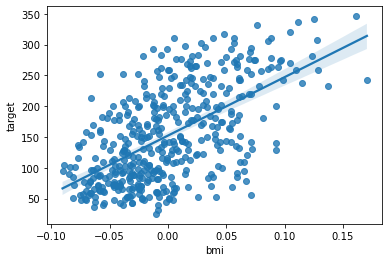

In [105]:
sns.regplot(x = 'bmi', y = 'target', data = df)
plt.show()

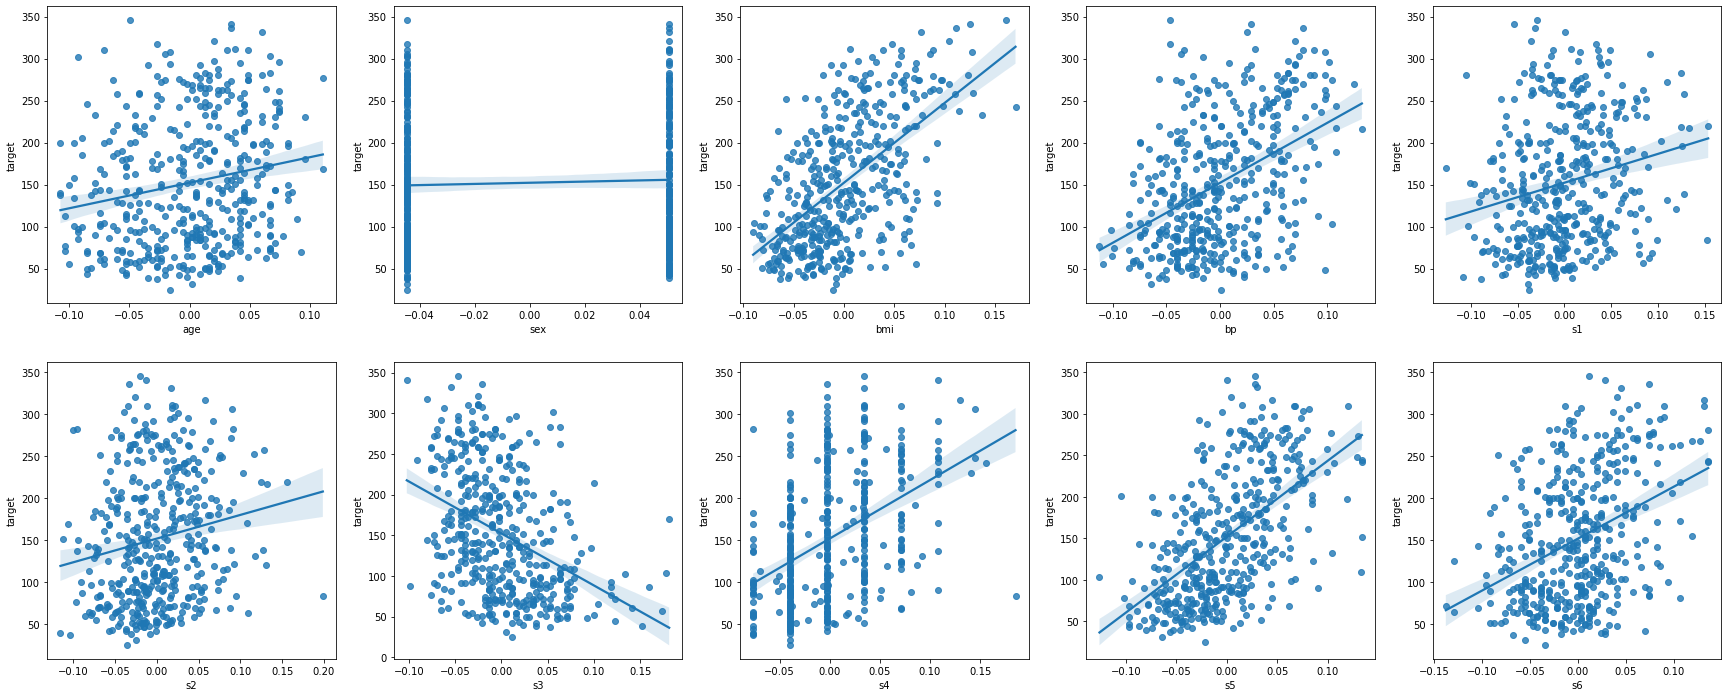

In [106]:
_, axs = plt.subplots(nrows = 2, ncols = 5, figsize = (30, 12))
for i, feature in enumerate(df.columns[0:-1]):
    row, col = i // 5, i % 5
    sns.regplot(x = feature, y = 'target', data = df, ax = axs[row][col])

- feature별 R squared value

In [107]:
from sklearn.linear_model import LinearRegression

In [108]:
# bmi
X = df.bmi.values.reshape(-1, 1)
y = diabetes.target
lr = LinearRegression()
lr.fit(X, y)
lr.score(X, y)

0.3439237602253803

In [109]:
y = diabetes.target
for feature in df.columns[:-1]:
    X = df[feature].values.reshape(-1, 1)
    lr = LinearRegression()
    lr.fit(X, y)
    score = lr.score(X, y)
    print(f'{feature}:\t{score:.4f}')

age:	0.0353
sex:	0.0019
bmi:	0.3439
bp:	0.1949
s1:	0.0450
s2:	0.0303
s3:	0.1559
s4:	0.1853
s5:	0.3202
s6:	0.1463


- 테스트 데이터셋 분류

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    diabetes.data, diabetes.target, test_size=0.1, random_state=2021
)

### 다중 회귀 (MSE 비교)
- LinearRegression
- SVR
- RandomForestRegressor

In [111]:
from sklearn.metrics import mean_squared_error

#### 1. LinearRegression

In [112]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, pred_lr)
mse_lr

2370.1978745563165

#### 2. SVR

In [113]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, y_train)
pred_sv = svr.predict(X_test)
mse_sv = mean_squared_error(y_test, pred_sv)
mse_sv

3960.9366880199996

#### 3. RandomForestRegressor

In [114]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=2021)
rfr.fit(X_train, y_train)
pred_rf = rfr.predict(X_test)
mse_rf = mean_squared_error(y_test, pred_rf)
mse_rf

3824.664311111111

### 비교

In [122]:
print(f'MSE 결과 비교\nLR : {mse_lr:.4f}\nSVR : {mse_sv:.4f}\nRF : {mse_rf:.4f}')

MSE 결과 비교
LR : 2370.1979
SVR : 3960.9367
RF : 3824.6643


In [123]:
df = pd.DataFrame({
    'y_test' : y_test,
    'LR' : pred_lr,
    'SVR' : pred_sv,
    'RF' : pred_rf,
})
df.head()

,y_test,LR,SVR,RF
0,155.0,156.031216,133.705341,111.79
1,167.0,185.700495,146.907788,144.81
2,185.0,162.863840,140.965960,175.52
3,109.0,162.545441,144.683128,154.34
4,65.0,78.518494,118.088552,96.48
